To install matplotlib

import sys  
!{sys.executable} -m pip install matplotlib

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('test_data.csv')
data = pd.read_csv('C:\\projects\\ad_metrics_test\\test_data.csv', thousands=',', decimal='.')

revenue_columns = ['Spend','Revenue_in_app1d', 'Revenue_in_app7d', 'Revenue_in_app30d', 'Revenue_ad1d']
for col in revenue_columns:
    df[col] = df[col].str.replace(',', '').str.replace('"', '').astype(float)


CPI (3 кампании, которые затрачивают меньше средств на привлечение каждой установки)

In [18]:
df['CPI'] = df['Spend'] / df['Installs']
df['CPI'].sort_values(ascending=True).head(3)

81    0.145833
55    0.273413
64    1.102767
Name: CPI, dtype: float64

CPC (3 кампании,которые тратят меньше средств на привлечение каждого клика)

In [19]:
df['CPC'] = df['Spend'] / df['Clicks']
df['CPC'].sort_values(ascending=True).head(3)

81    0.068182
55    0.123369
64    0.508197
Name: CPC, dtype: float64

CTR (3 кампании с более высоким уровнем вовлеченности и реакции аудитории на рекламу)

In [20]:
df['CTR'] = df['Clicks'] / df['Impressions'] * 100
df['CTR'].sort_values(ascending=False).head(3)

23    7.936193
52    6.461992
46    5.638322
Name: CTR, dtype: float64

CR (3 кампании с более высоким CR (число установок к числу кликов)) 

In [21]:
df['CR'] = df['Installs'] / df['Clicks']  * 100
df['CR'].sort_values(ascending=False).head(3)

67    61.538462
12    60.853199
13    60.359444
Name: CR, dtype: float64

ROI (3 капмании с более высоким ROI (Отношение прибыли к затратам на рекламу на первый день их жизни))

In [22]:
df['ROI'] = df['Revenue_ad1d'] / df['Spend']  * 100
df['ROI'].sort_values(ascending=False).head(3)

81    1.763441e+07
29    9.559874e+06
46    1.913464e+06
Name: ROI, dtype: float64

ARPU  (Средняя выручка с одного пользователя на первый день, 3 кампании с большей выручкой с одного пользователя)

In [23]:
df['ARPU'] = df['Revenue_in_app1d'] / df['Payers1d']  * 100
df['ARPU'].sort_values(ascending=False).head(3)

4    4.757500e+08
8    4.188333e+08
0    2.534688e+08
Name: ARPU, dtype: float64

Cost per Conversion (3 кампании с меньшей стоимостью привлечения каждой регистрации)

In [24]:
df['Cost_per_Conversion_r'] = df['Spend'] / df['Registrations']
df['Cost_per_Conversion_r'].sort_values(ascending=True).head(3)

81    0.338710
55    0.511163
29    2.973970
Name: Cost_per_Conversion_r, dtype: float64

Группируем данные по байерам и суммируем затраты и создаем график

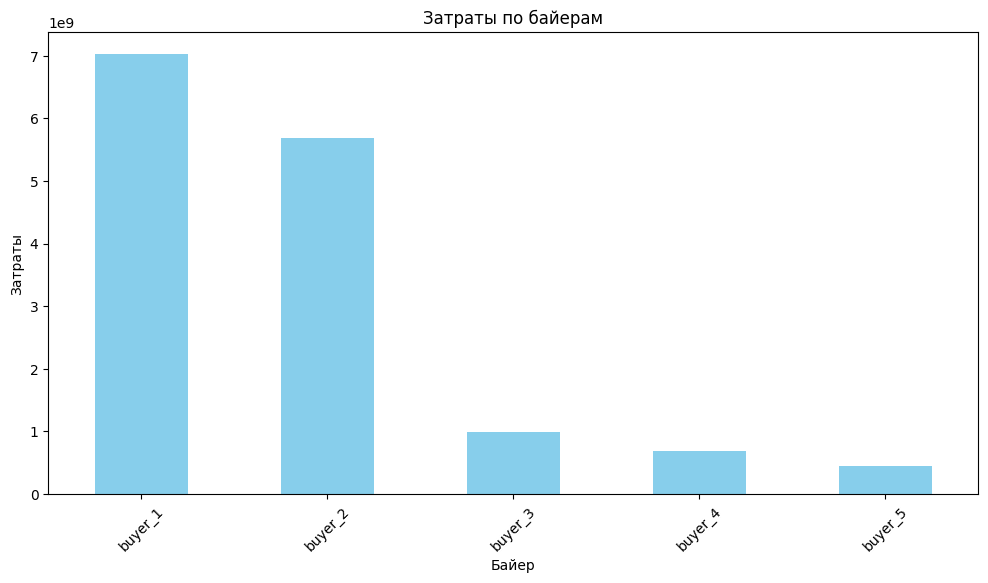

In [25]:
spend_by_buyer = data.groupby('Buyer')['Spend'].sum()

plt.figure(figsize=(12, 6))
spend_by_buyer.plot(kind='bar', color='skyblue')
plt.title('Затраты по байерам')
plt.xlabel('Байер')
plt.ylabel('Затраты')
plt.xticks(rotation=45)
plt.show()